### Student Information
Name:

Student ID:R14K47024

GitHub ID:IvyChouCandy

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### >>> **Set up**

In [38]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

### >>> **Exercise 1 :**

In [39]:
#load data
original_dataDf = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
#see data
print(len(original_dataDf))

###Exercise 1 :print out the text data for the first three samples in the dataset.
for i in range(3):
    print(f"example{i+1}:")
    print("\n".join(original_dataDf["text"][i].split("\n")))

847
example1:
Calls on retards
example2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example3:
Seeing lots of red in the ticker.


### >>> **Exercise 2:**

In [40]:
###Exercise 2 :query the last 10 records
print(original_dataDf["text"].tail(10))

837               Finance media lying \r\n\r\n*Surprise*
838                                          I am all in
839                                 The Art of the Deal…
840                                               Lol fr
841    So countries “begging to stop the tariffs” and...
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, dtype: object


### >>> **Exercise 4:**

In [41]:
###Exercise 4:check missing values
original_dataDf.isnull().apply(lambda x:dmh.check_missing_values(x))
#只有在"downvotes"及"upvote_ratio"欄位有缺失值，但這兩個欄位不是主要在pahse 1要分析的欄位

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> **Exercise 5:**

In [42]:
###Exercise 5:check string type missing values
#check "text"、"sentiment" and "label"(確認是否含有string type的空值，只檢查這些欄位是因為主要在pahse 1分析的欄位是這三個)
try:
    # 建立布林遮罩，檢查是否為空字串或全空白
    mask = original_dataDf[["sentiment","label"]].apply(lambda col: col.str.strip().eq(""))
    empty_counts = mask.sum()
    print(empty_counts)
except AttributeError:
    print("No string type missing values found in 'sentiment' and 'label' columns.")
    # 建立布林遮罩，檢查是否為空字串或全空白
    mask_text = original_dataDf["text"].astype(str).str.strip().eq("") | original_dataDf["text"].isna()
    if mask_text.sum() > 0:
        print(f"Found {mask_text.sum()} string type missing values in 'text' column.")
    else:
        print("No string type missing values found in 'text' column.")
#因為"text"欄位與"sentiment"、"label"欄位的資料型態不同，所以分開檢查

No string type missing values found in 'sentiment' and 'label' columns.
No string type missing values found in 'text' column.


In [43]:
###check duplicates
sum_duplicates = original_dataDf.duplicated().sum()
if sum_duplicates > 0:
    print(f"Found {sum_duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


### >>> **Exercise 6:**

In [44]:
###Exercise 6:check difference between sampling and original data
sample_dataDf = original_dataDf.sample(n=int(0.2*len(original_dataDf)), random_state=42)
print(f"original data length: {len(original_dataDf)}")
print(f"sample data length: {len(sample_dataDf)}")
print("Equal?",original_dataDf.equals(sample_dataDf))
print("Index difference:",set(original_dataDf.index) - set(sample_dataDf.index))
print("Head of original data:",original_dataDf.head())
print("Head of sample data:",sample_dataDf.head())
#從結果可以看出，兩者的行列數、內容、順序、index皆不同

original data length: 847
sample data length: 169
Equal? False
Index difference: {0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 64, 68, 69, 70, 71, 73, 74, 75, 79, 80, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 242, 24

### >>> **Exercise 7 :**

In [45]:
###Exercise 7:visualize and analyze the disparity between the two datasets
#檢查"sentiment"和"label"欄位的分布
original_sentiment_counts = original_dataDf['sentiment'].value_counts()
sample_sentiment_counts = sample_dataDf['sentiment'].value_counts()
original_label_counts = original_dataDf['label'].value_counts()
sample_label_counts = sample_dataDf['label'].value_counts()
print("Original sentiment distribution:\n", original_sentiment_counts)
print("Sample sentiment distribution:\n", sample_sentiment_counts)
print("Original label distribution:\n", original_label_counts)
print("Sample label distribution:\n", sample_label_counts)
#視覺化(使用自動調整ylim)

Original sentiment distribution:
 sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64
Sample sentiment distribution:
 sentiment
 0.0    67
 1.0    66
-1.0    36
Name: count, dtype: int64
Original label distribution:
 label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64
Sample label distribution:
 label
 0.0    73
-1.0    66
 1.0    30
Name: count, dtype: int64


<Axes: title={'center': 'Original Sentiment Distribution'}, xlabel='sentiment'>

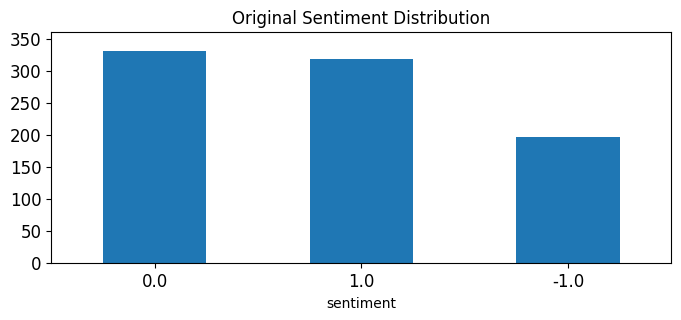

In [46]:
# Original Sentiment Distribution
original_sentiment_counts.plot(kind='bar', 
                               title='Original Sentiment Distribution', 
                               ylim=[0, original_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Sentiment Distribution'}, xlabel='sentiment'>

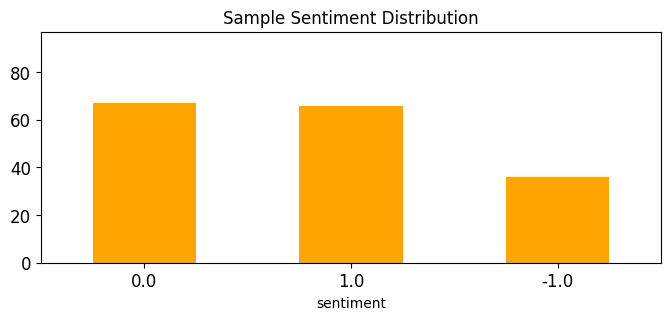

In [47]:
# Sample Sentiment Distribution
sample_sentiment_counts.plot(kind='bar',color='orange', 
                               title='Sample Sentiment Distribution', 
                               ylim=[0, sample_sentiment_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Original Label Distribution'}, xlabel='label'>

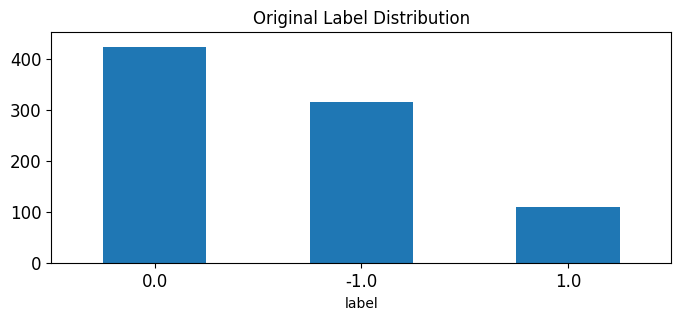

In [48]:
# Original Label Distribution
original_label_counts.plot(kind='bar', 
                               title='Original Label Distribution', 
                               ylim=[0, original_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

<Axes: title={'center': 'Sample Label Distribution'}, xlabel='label'>

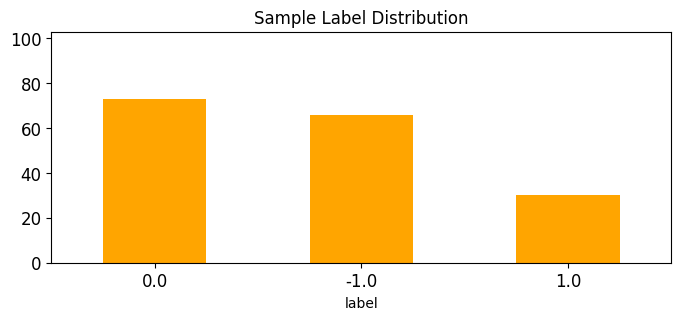

In [49]:
# Sample Label Distribution
sample_label_counts.plot(kind='bar',color='orange', 
                               title='Sample Label Distribution', 
                               ylim=[0, sample_label_counts.max()+30],
                               rot=0,
                               fontsize=12,
                               figsize=(8,3))

### >>> **Exercise 8 :** 

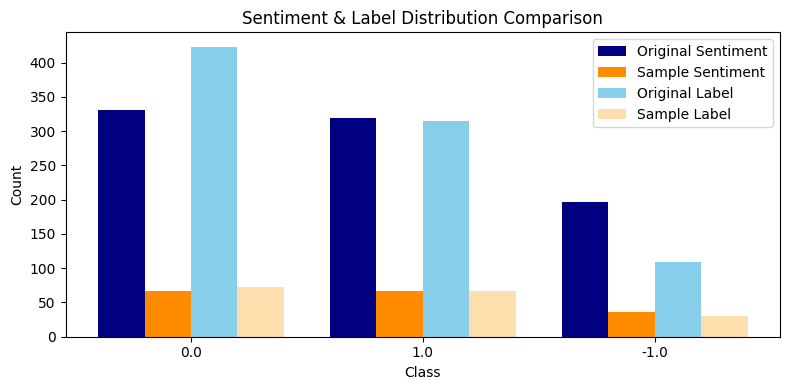

In [50]:
###Exercise 8 :combined bar plot
# 將四組資料放在同一張圖表中比較
# 假設這四個 Series 都是以 -1,0,1 為 index
x = np.arange(len(original_sentiment_counts.index))  # [-1,0,1] 的位置
width = 0.2  # 每個 bar 的寬度

fig, ax = plt.subplots(figsize=(8, 4))

# 繪製四組資料，依序往右偏移
ax.bar(x - 1.5*width, original_sentiment_counts.values, width, label='Original Sentiment', color='navy')
ax.bar(x - 0.5*width, sample_sentiment_counts.values, width, label='Sample Sentiment', color='darkorange')
ax.bar(x + 0.5*width, original_label_counts.values, width, label='Original Label', color='skyblue')
ax.bar(x + 1.5*width, sample_label_counts.values, width, label='Sample Label', color='navajowhite')

# 設定 x 軸
ax.set_xticks(x)
ax.set_xticklabels(original_sentiment_counts.index)  # -1, 0, 1

# 加上標題、圖例
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Sentiment & Label Distribution Comparison")
ax.legend()

plt.tight_layout()
plt.show()


### **>>> Exercise 9 :**

In [51]:
original_dataDf['unigrams'] = original_dataDf['text'].apply(lambda x: dmh.tokenize_text(x))
original_dataDf[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [52]:
count_vect = CountVectorizer()
original_countsVector = count_vect.fit_transform(original_dataDf['text'])
#set new analtzer
analyze = count_vect.build_analyzer()
###Exercise 9 :analyze the first record of original dataframe with the new analyzer
analyze(original_dataDf['text'][0])

['calls', 'on', 'retards']

### **>>> Exercise 10 :**

In [53]:
#check the shape of original_countsVector
original_countsVector.shape

(847, 4346)

In [54]:
###Exercise 10 :provide code that can verify what word 1 represents from the vocabulary(in the fifth record)
row = original_countsVector[4]  # 取得第五筆資料的稀疏矩陣表示
word_indices = row.nonzero()[1]  # 取得非零元素的索引
words = count_vect.get_feature_names_out()[word_indices]  # 取得詞彙表
# 印出第五筆資料中出現的詞彙
print("word indices in the fifth record:", word_indices)
print("words in the fifth record:", words)

word indices in the fifth record: [1846 1169 3349 3844 4333]
words in the fifth record: ['he' 'didn' 'say' 'thank' 'you']


### **>>> Exercise 11 :** 

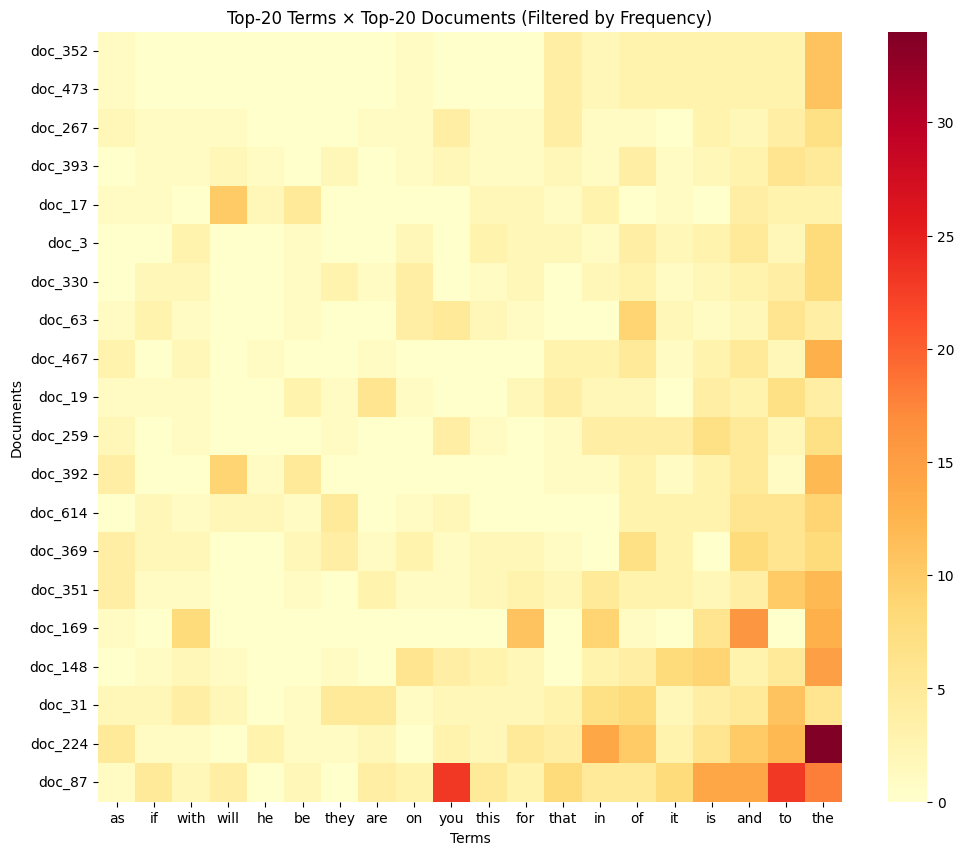

In [55]:
###Exercise 11 :draw heatmap
#先做詞頻統計，取出出現次數最高的前 N 個詞，再挑出這些詞裡，出現次數最多的文章，讓圖表更集中
# 計算每個詞的總頻率
# Step 1: 找出最常見的詞（例如 top 20）
word_freq = np.array(original_countsVector.sum(axis=0)).flatten()
top_terms_idx = word_freq.argsort()[-20:]
# Step 2: 在這些詞中，挑出最相關的文件
# 先把矩陣切到 top_terms
sub_matrix = original_countsVector[:, top_terms_idx]
# 計算文件總和（只針對這些詞）
doc_scores = np.array(sub_matrix.sum(axis=1)).flatten()
# 取出最高分的 20 文件
top_docs_idx = doc_scores.argsort()[-20:]
# Step 3: 建立子矩陣
sample_matrix = original_countsVector[top_docs_idx][:, top_terms_idx]

df_todraw = pd.DataFrame(
    sample_matrix.toarray(),
    columns=[count_vect.get_feature_names_out()[i] for i in top_terms_idx],
    index=["doc_" + str(i) for i in top_docs_idx]
)

# Step 4: 畫 heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_todraw, cmap="YlOrRd", cbar=True, annot=False)
plt.title("Top-20 Terms × Top-20 Documents (Filtered by Frequency)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

### >>> **Exercise 12 :**

In [56]:
#bulid term frequency matrix
term_frequencies = []
for j in range(0,original_countsVector.shape[1]):
    term_frequencies.append(sum(original_countsVector[:,j].toarray()))

In [57]:
term_frequencies = np.asarray(original_countsVector.sum(axis=0))[0]

In [58]:
###Exercise 12 :draw a nicer interactive visualization
import plotly.express as px

terms = count_vect.get_feature_names_out()

df = pd.DataFrame({
    "term": terms,
    "frequency": term_frequencies
})

df_300 = df[:300]

fig = px.bar(
    df_300,
    x="term",
    y="frequency",
    text="frequency", 
    title="Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 13 :**

In [59]:
###Exercise 13 :efficiently reduce the number of terms want to visualize
df_top = df.sort_values(by="frequency", ascending=False)
#取前50個頻率最高的詞
df_top50 = df_top.head(50)

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    text="frequency",   
    title="Top 50 Most Frequent Terms",
    labels={"term": "Term", "frequency": "Frequency"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **Exercise 14 :**

In [60]:
###Exercise 14:sort the terms on the `x-axis` by frequency instead of in alphabetical order
fig = px.bar(
    df_top.head(300),
    x="term",
    y="frequency",
    text="frequency",
    title="Terms (Sorted by Frequency)",
    labels={"term": "Term", "frequency": "Frequency"}
)

fig.update_traces(textposition="outside", marker_color="orange")
fig.update_layout(xaxis_tickangle=-45, template="plotly_white")
fig.show()

### >>> **Exercise 15 :** 

In [61]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [62]:
###Exercise 15:change the 'term_frequencies' variable for the 'term_frequencies_log'
log_df = pd.DataFrame({
    "term": terms,
    "frequency_log": term_frequencies_log
})

log_df_top = log_df.sort_values(by="frequency_log", ascending=False)
log_df_top300 = log_df_top.head(300)


fig = px.bar(
    log_df_top300,
    x="term",
    y="frequency_log",
    text="frequency_log",   
    title="Terms(Sorted by Log Frequency)",
    labels={"term": "Term", "frequency_log": "Frequency_log"},
)

fig.update_traces(marker_color="orange", textposition="outside")
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    font=dict(size=14)
)

fig.show()

### >>> **new data visualizations** 

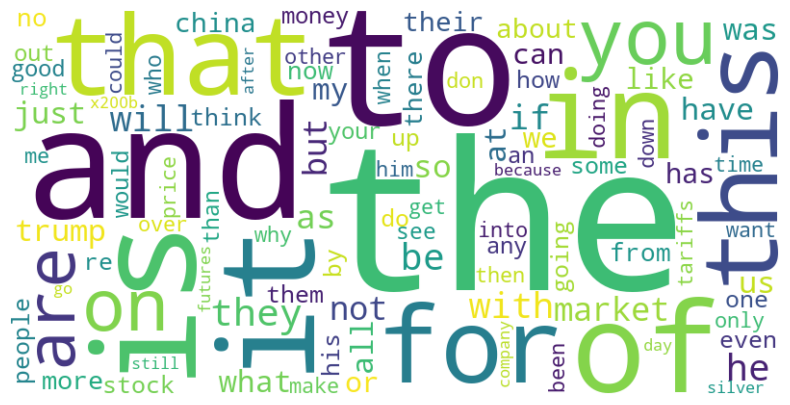

In [68]:
#New 1:詞雲
from wordcloud import WordCloud
# 建立字詞頻率字典
term_frequencieslist = term_frequencies.tolist()
word_freq_dict = dict(zip(terms, term_frequencieslist))
sorted_word_freq = dict(sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)) #排序
#取前100出現最多次的詞
terms_keys = sorted_word_freq.keys()
dict_slice100 = {}
for key in list(terms_keys)[:100]:
    dict_slice100[key] = sorted_word_freq[key]
# 繪製詞雲
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      colormap="viridis").generate_from_frequencies(dict_slice100)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
#一樣使用詞出現的頻率來畫圖，圖中越大的詞代表出現頻率越高
#跟前面的長條圖表達的意義相同，都是"the"、"to"、"and"是前三高出現的詞

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2634672769.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



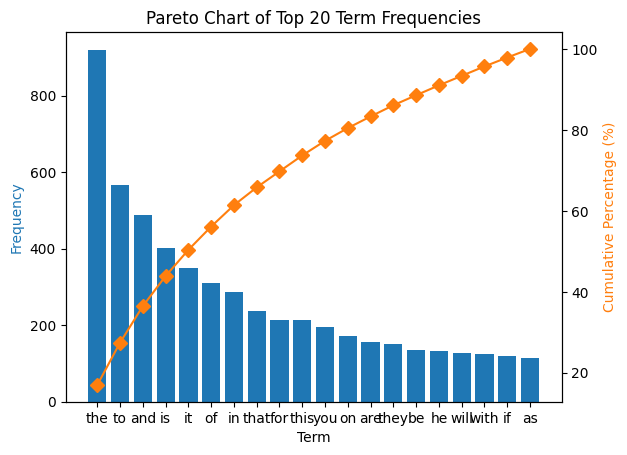

In [64]:
#New 2:Pareto Chart:結合長條圖和累積折線圖
#取前20頻率最高的字詞
df_20 = df_top.head(20)
#計算累積百分比
df_20["cum_percent"] = df_20["frequency"].cumsum()/df_20["frequency"].sum()*100

#繪圖
fig, ax1 = plt.subplots()

# 長條圖
ax1.bar(df_20["term"], df_20["frequency"], color='C0')
ax1.set_xlabel('Term')
ax1.set_ylabel('Frequency', color='C0')

# 折線圖
ax2 = ax1.twinx()
ax2.plot(df_20["term"], df_20["cum_percent"], color='C1', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage (%)', color='C1')

plt.title('Pareto Chart of Top 20 Term Frequencies')
plt.show()

#由Pareto Chart中可以看出，長條圖很值觀的顯示哪些詞出現的頻率最高，而累積折線圖則可以看出這些高頻詞佔整體詞彙的比例
#根據所有詞彙的累積百分比，可以發現前8個高頻詞大約佔了總詞彙數的60%左右，這符合帕累托原理(80/20法則)中少數重要因素佔多數結果的概念

In [65]:
#New 3:Tree map:用矩形區塊大小表示詞頻
import plotly.express as px
#取前50頻率最高的字詞
df_top50 = df_top.head(50)
fig = px.treemap(
    df_top50,
    path=['term'],  # 使用 'term' 作為層級
    values='frequency',  # 使用 'frequency' 作為區塊大小
    title='Tree Map of Top 50 Terms by Frequency'
)
fig.show()
#由Tree map可以很直觀的看出哪些詞出現的頻率較高，因為這些詞會佔據較大的區塊面積
#像是"the"、"of"、"and"這些詞的區塊面積就明顯大於其他詞，表示它們出現的頻率較高


In [66]:
#New 4:Bubble Chart:字詞用氣泡大小表示頻率，可以加上其他維度（例如：詞長、TF-IDF 值）
#取前50頻率最高的字詞
df_20["term_length"] = df_20["term"].apply(len)
fig = px.scatter(
    df_20,
    x="term",
    y="frequency",
    size="frequency",  # 氣泡大小根據頻率
    color="term_length",  # 氣泡顏色根據詞長
    hover_name="term",  # 滑鼠懸停顯示詞
    title="Bubble Chart of Top 20 Terms",
    labels={"term": "Term", "frequency": "Frequency", "term_length": "Term Length"},
    size_max=60  # 最大氣泡大小
)
fig.show()
#由Bubble Chart可以看出哪些詞出現的頻率較高，因為這些詞會以較大的氣泡顯示
#同時也可以根據顏色看到詞長的分布情況


C:\Users\user\AppData\Local\Temp\ipykernel_8020\1893442800.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Phase 2

In [67]:
### Begin Assignment Here